## Credit Card Approval Prediction:

**Abstract:**

Banks receive a lot of applications for issuance of credit cards.Many of them are rejected for many reasons,like high-loan balances,low-income levels,or too many inquiries on an individual's credit report.Manually analyzing these applications is error prone and a time consuming process.This task can be automated with the power of machine learning.In this project,we will build an automatic credit card approval predictor using machine learning techniques,just like the real banks do.
    

**Problem Statement:**
The task is to analyze and build a predictive model that can accurately determine whether a credit card application should be approved or rejected based on various applicant attributes and historical credit data.

**Goal of the Project:**
The goal is to develop a model that can that can assist financial institutions in making informed decisions while minimizing the risk of default and maximizing profitability.

They have given a problem to identify the customers segments which are eligible for Credit Card approval, so that they can specifically target these customers. 

## **Variable Description:** 
**File - Application Record.csv** 



Column name:	                                 Description 
 
ID                                        Unique Id of the row  
CODE_GENDER                Gender of the applicant. M is male and F is female.  
FLAG_OWN_CAR	           Is an applicant with a car? Y is Yes and N is NO.
FLAG_OWN_REALTY 	       Is an applicant with realty? Y is Yes and N is No. 
CNT_CHILDREN                              Count of children. 
AMT_INCOME_TOTAL 	                   the amount of the income. 
NAME_INCOME_TYPE 	       The type of income (5 types in total). 
NAME_EDUCATION_TYPE 	   The type of education (5 types in total). 
NAME_FAMILY_STATUS 	       The type of family status (6 types in total). 
DAYS_BIRTH 	           The number of the days from birth (Negative values). 
DAYS_EMPLOYED 	       The number of the days from employment (Negative values). This column has error values. 
FLAG_MOBIL 	                      Is an applicant with a mobile? 1 is True and 0 is False 
FLAG_WORK_PHONE 	   Is an applicant with a work phone? 1 is True and 0 is False. 
FLAG_PHONE 	           Is an applicant with a phone? 1 is True and 0 is False. 
FLAG_EMAIL 	           Is an applicant with an email? 1 is True and 0 is False.   
OCCUPATION_TYPE 	   The type of occupation (19 types in total). This column has missing values. 
CNT_FAM_MEMBERS 	                   The count of family members. 

### **File - Credit Record.csv**

●DAYS_BIRTH ---> Count backwards from current day (0), -1 means yesterday. 

●DAYS_EMPLOYED ---> Count backwards from current day (0). If positive, it means the person currently unemployed. 

●MONTHS_BALANCE ---> The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on. 

●STATUS ---> 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write offs for more than 150 days C: paid off that month X: No loan for the month 

**Scope:**

●Understand data by performing exploratory data analysis. 

●Training and building classification algorithm to predict if a customer will be approved with credit card or not. 

●Understand feature importance and improve the model.

●Understand various model performance metrics and measure the performance of each model. 

**Objective & Learning Outcome:** 
The objective is to train a machine learning model using the provided dataset to predict the approval outcome for new credit card applications accurately. The model should generalize well to unseen data and provide a reliable assessment of the creditworthiness of applicants. 
Students should be able to predict credit card approval from records with the help of a classification model. They should also be able to perform EDA and re-build the model and check if there is any significant change in the predictive scores.

# **Required Libraries:**

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as pyo
from plotly import tools
from plotly.subplots import make_subplots

In [2]:
data = pd.read_csv('application_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
print("No of datapoints for application records : {}".format(len(data)))
print("No. of unique clients in dataset : {}".format(len(data.ID.unique())))

No of datapoints for application records : 438557
No. of unique clients in dataset : 438510


In [4]:
records = pd.read_csv('credit_record.csv')
records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
print("No of datapoints for credit records : {}".format(len(records)))
print("No. of unique clients in dataset : {}".format(len(records.ID.unique())))

No of datapoints for credit records : 1048575
No. of unique clients in dataset : 45985


In [6]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

In [7]:
print(f'Duplicates in applications data : {data.iloc[:,1:].duplicated().sum()},({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')

Duplicates in applications data : 348472,(79.5%)


In [8]:
print(f'Duplicates in records data: {records.duplicated().sum()},({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in records data: 0,(0.0%)


# Drop duplicates:

In [9]:
data = data.drop_duplicates(subset=data.columns[1:], keep='first')

In [10]:
data.shape

(90085, 18)

In [11]:
len(set(records['ID']).intersection(set(data['ID'])))


9709

In [12]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['Column_name','Num_unique']).sort_values(by=['Num_unique'])

In [13]:
unique_counts

,Column_name,Num_unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [14]:
unique_counts = pd.DataFrame.from_records([(col, records[col].nunique()) for col in records.columns],
                                         columns=['Column_name','Num_unique']).sort_values(by=['Num_unique'])

In [15]:
unique_counts

,Column_name,Num_unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [16]:
data.drop(['FLAG_MOBIL'], axis=1, inplace=True)

In [17]:
data.shape

(90085, 17)

# Handling missing values

In [18]:
data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        27477
CNT_FAM_MEMBERS            0
dtype: int64

In [19]:
!pip install missingno

In [20]:
import missingno as msno

Text(0.5, 1.0, 'Missing Data for application records dataset')

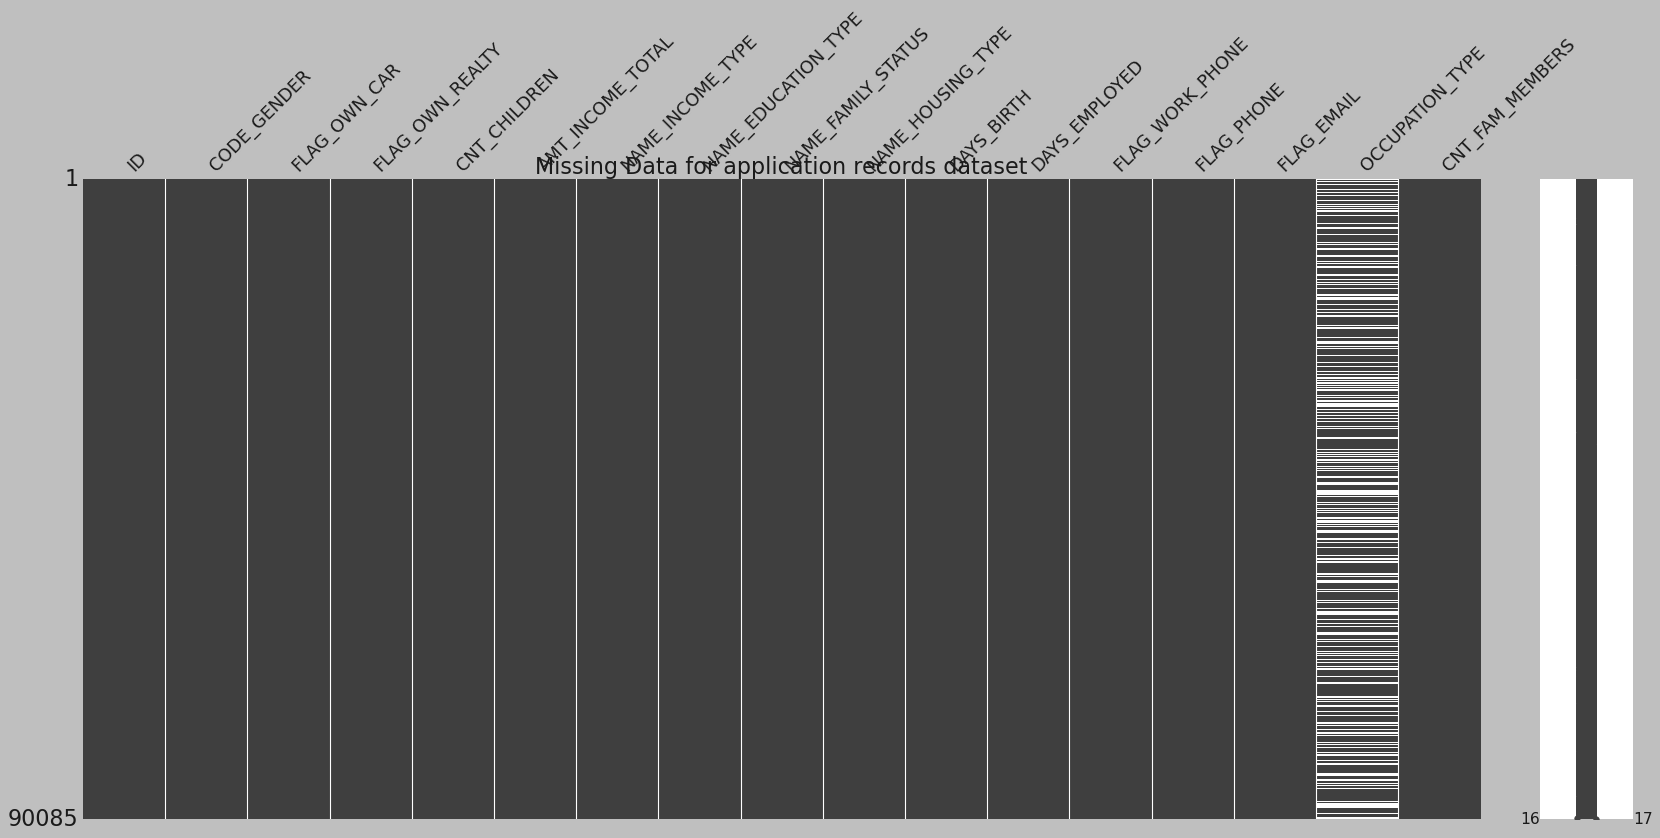

In [21]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset", fontsize=20)

In [22]:
data['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

Text(0.5, 1.0, 'Missing Data for application records dataset')

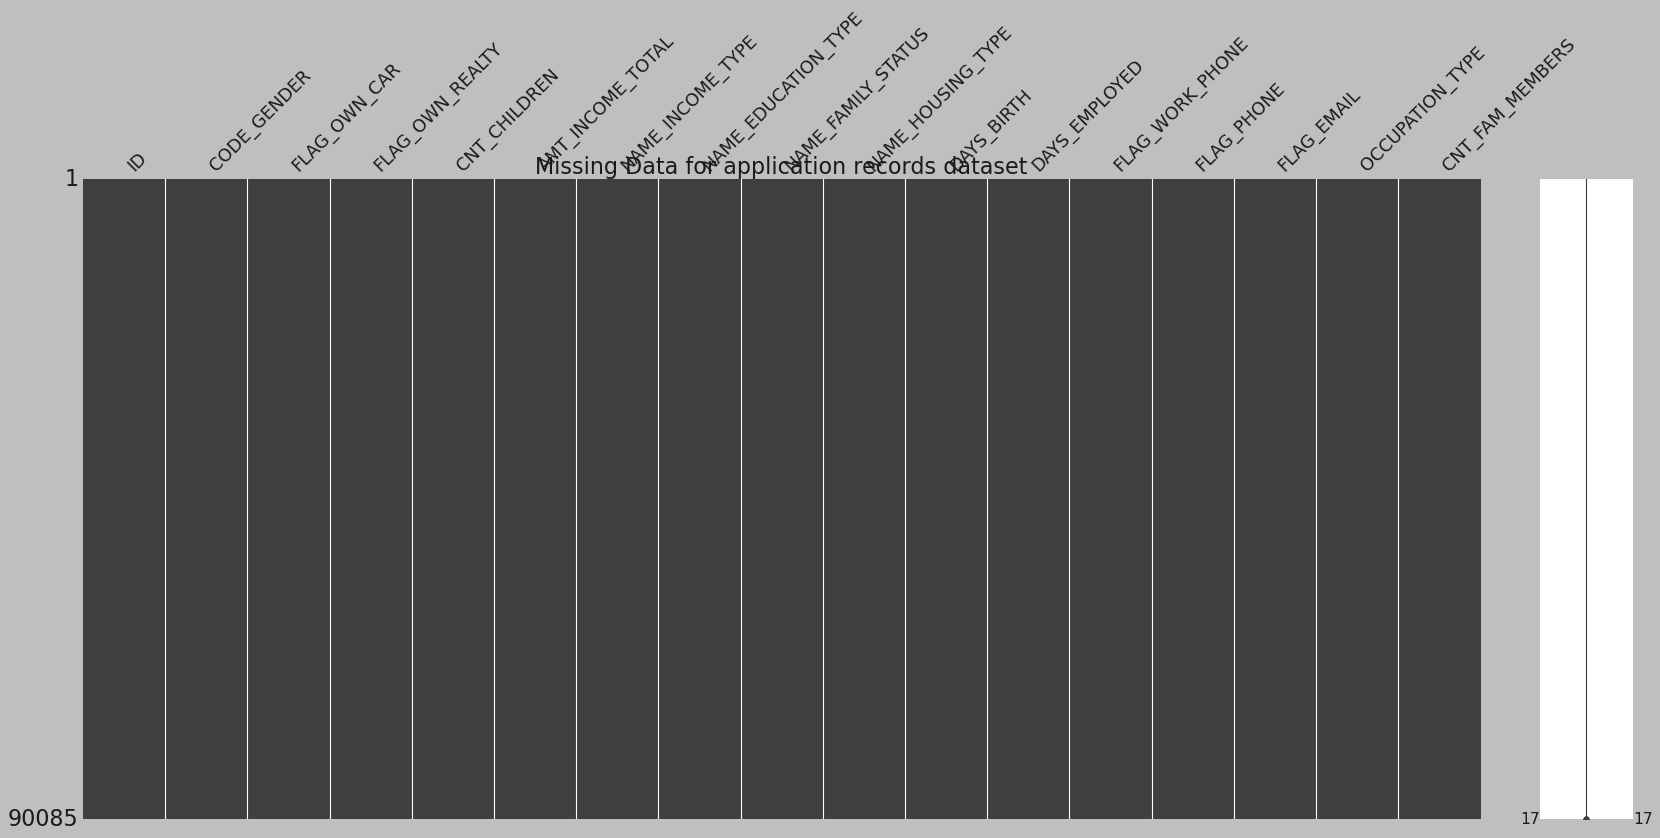

In [23]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset", fontsize=20)

In [24]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

Text(0.5, 1.0, 'Missing Data for credit records dataset')

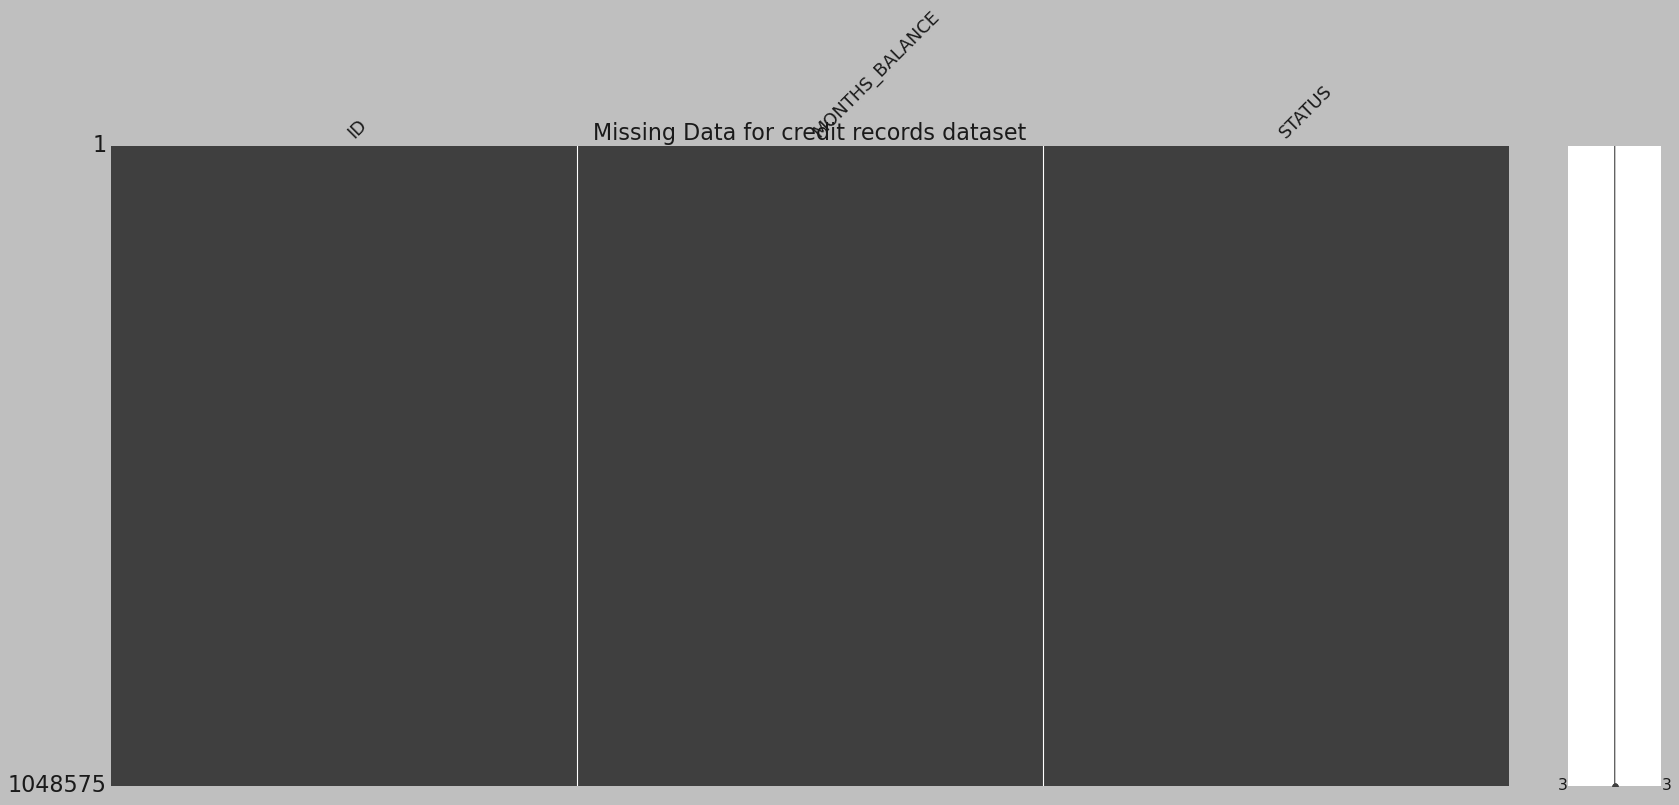

In [25]:
missing2 = msno.matrix(records)
missing2.set_title("Missing Data for credit records dataset", fontsize=20)

# Converting data in a proper format

In [26]:
records['target'] = records['STATUS']
records['target'].replace('X',0, inplace=True)
records['target'].replace('C',0, inplace=True)
records['target'] = records['target'].astype(int)
records.loc[records['target']>=1, 'target']=1

In [27]:
records['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [28]:
records

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [29]:
records['target'].value_counts()

0    1034381
1      14194
Name: target, dtype: int64

In [30]:
df = pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [31]:
df

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0
...,...,...
45980,5150482,0
45981,5150483,0
45982,5150484,0
45983,5150485,0


In [32]:
df['target'].value_counts()

0    40635
1     5350
Name: target, dtype: int64

In [33]:
new_df = pd.merge(data, df, how='inner', on=['ID'])

In [34]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0


In [35]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   CODE_GENDER          9709 non-null   object 
 2   FLAG_OWN_CAR         9709 non-null   object 
 3   FLAG_OWN_REALTY      9709 non-null   object 
 4   CNT_CHILDREN         9709 non-null   int64  
 5   AMT_INCOME_TOTAL     9709 non-null   float64
 6   NAME_INCOME_TYPE     9709 non-null   object 
 7   NAME_EDUCATION_TYPE  9709 non-null   object 
 8   NAME_FAMILY_STATUS   9709 non-null   object 
 9   NAME_HOUSING_TYPE    9709 non-null   object 
 10  DAYS_BIRTH           9709 non-null   int64  
 11  DAYS_EMPLOYED        9709 non-null   int64  
 12  FLAG_WORK_PHONE      9709 non-null   int64  
 13  FLAG_PHONE           9709 non-null   int64  
 14  FLAG_EMAIL           9709 non-null   int64  
 15  OCCUPATION_TYPE      9709 non-null   o

In [36]:
new_df['target'].value_counts()

0    8426
1    1283
Name: target, dtype: int64

In [37]:
new_df['DAYS_BIRTH']

0      -12005
1      -21474
2      -19110
3      -22464
4      -16872
        ...  
9704   -20600
9705   -15837
9706   -19101
9707   -12387
9708    -9188
Name: DAYS_BIRTH, Length: 9709, dtype: int64

In [38]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'target'],
      dtype='object')

In [39]:
new_df["Age_Years"] = round(-new_df['DAYS_BIRTH']/365,0)

In [40]:
new_df["Age_Years"]

0       33.0
1       59.0
2       52.0
3       62.0
4       46.0
        ... 
9704    56.0
9705    43.0
9706    52.0
9707    34.0
9708    25.0
Name: Age_Years, Length: 9709, dtype: float64

In [41]:
new_df.drop(['DAYS_BIRTH'], axis=1, inplace=True)

In [42]:
new_df



,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0


In [43]:
new_df['Unemployed'] = 0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'Unemployed']=1

In [44]:
new_df 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0,0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0,0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0,0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0,0


In [45]:
new_df["Years_Employed"] = round(-new_df['DAYS_EMPLOYED']/365,0)

In [46]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Years_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1,-1001.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0,2.0


In [47]:
new_df.loc[new_df['Years_Employed']<0,'Years_Employed'] = 0

In [48]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Years_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,34.0,0,4.0


In [49]:
new_df.drop("DAYS_EMPLOYED", axis=1, inplace=True)

In [50]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age_Years,Unemployed,Years_Employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,56.0,0,1.0
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,43.0,0,7.0
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,52.0,0,5.0
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,34.0,0,4.0


In [51]:
new_df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'target', 'Age_Years', 'Unemployed', 'Years_Employed'],
      dtype='object')

# Renaming the column names

In [52]:
new_df = new_df.rename(columns={'CODE_GENDER':'Gender', 'FLAG_OWN_CAR':'Own_Car', 
                               'FLAG_OWN_REALTY':'Own_Property', 'CNT_CHILDREN':'Num_Children',
       'AMT_INCOME_TOTAL':'Total_Income', 'NAME_INCOME_TYPE':'Income_Type', 
                               'NAME_EDUCATION_TYPE':'Education_Type',
       'NAME_FAMILY_STATUS':'Family_Status', 'NAME_HOUSING_TYPE':'Housing_Type', 
                               'FLAG_WORK_PHONE':"Work_Phone",
       'FLAG_PHONE':'Phone', 'FLAG_EMAIL':'Email', 'OCCUPATION_TYPE':'Occupation_Type', 
                               'CNT_FAM_MEMBERS':'Num_Family_Members',
       'target':'Target', 'Age_Years':'Age', 'Unemployed':'Unemployed', 
                               'Years_Employed':'Years_Experience'})

In [53]:
new_df.head(1)

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Work_Phone,Phone,Email,Occupation_Type,Num_Family_Members,Target,Age,Unemployed,Years_Experience
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0


In [54]:
new_df.dtypes

ID                      int64
Gender                 object
Own_Car                object
Own_Property           object
Num_Children            int64
Total_Income          float64
Income_Type            object
Education_Type         object
Family_Status          object
Housing_Type           object
Work_Phone              int64
Phone                   int64
Email                   int64
Occupation_Type        object
Num_Family_Members    float64
Target                  int32
Age                   float64
Unemployed              int64
Years_Experience      float64
dtype: object

# EDA(Exporatory Data Analysis):

## Histogram

<Figure size 800x800 with 0 Axes>

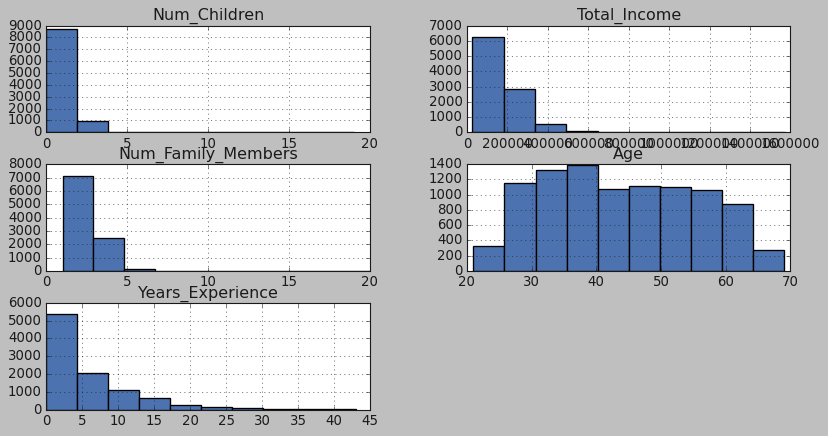

In [55]:
plt.figure(figsize=(10,10))
cols_to_plot = ["Num_Children","Total_Income","Num_Family_Members","Age","Years_Experience"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

## Count Plot

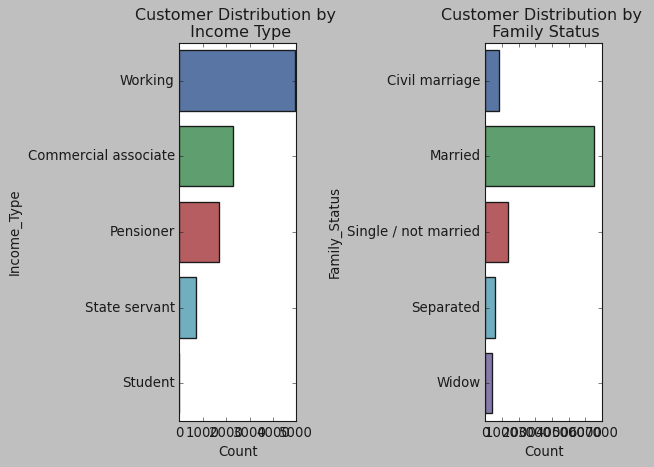

In [56]:
ig, axes = plt.subplots(1,2)

g1 = sns.countplot(y=new_df.Income_Type, linewidth =1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Income Type")
g1.set_xlabel("Count")

g2 = sns.countplot(y=new_df.Family_Status, linewidth =1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

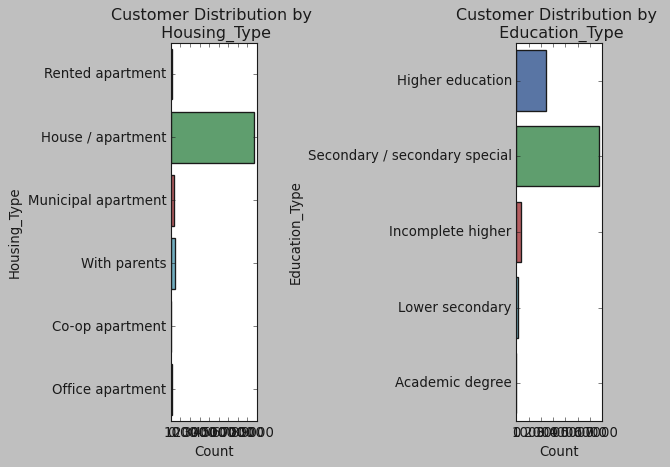

In [57]:
ig, axes = plt.subplots(1,2)

g1 = sns.countplot(y=new_df.Housing_Type, linewidth =1.2, ax=axes[0])
g1.set_title("Customer Distribution by \n Housing_Type")
g1.set_xlabel("Count")

g2 = sns.countplot(y=new_df.Education_Type, linewidth =1.2, ax=axes[1])
g2.set_title("Customer Distribution by \n Education_Type")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

In [58]:
object_columns = new_df.columns[new_df.dtypes=='object'].tolist()

In [59]:
object_columns

['Gender',
 'Own_Car',
 'Own_Property',
 'Income_Type',
 'Education_Type',
 'Family_Status',
 'Housing_Type',
 'Occupation_Type']

In [60]:
unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                                         columns=['Column_Name',"No_Unique"]).sort_values(by=['No_Unique'])
unique_counts

,Column_Name,No_Unique
0,Gender,2
1,Own_Car,2
2,Own_Property,2
3,Income_Type,5
4,Education_Type,5
5,Family_Status,5
6,Housing_Type,6
7,Occupation_Type,19


In [61]:
for i in new_df.columns[(new_df.dtypes=='object').values].tolist():
    print(i, '\n')
    print(new_df[i].value_counts())
    print("************************"*5)

Gender 

F    6323
M    3386
Name: Gender, dtype: int64
************************************************************************************************************************
Own_Car 

N    6139
Y    3570
Name: Own_Car, dtype: int64
************************************************************************************************************************
Own_Property 

Y    6520
N    3189
Name: Own_Property, dtype: int64
************************************************************************************************************************
Income_Type 

Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Income_Type, dtype: int64
************************************************************************************************************************
Education_Type 

Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower second

In [62]:
new_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Property', 'Num_Children',
       'Total_Income', 'Income_Type', 'Education_Type', 'Family_Status',
       'Housing_Type', 'Work_Phone', 'Phone', 'Email', 'Occupation_Type',
       'Num_Family_Members', 'Target', 'Age', 'Unemployed',
       'Years_Experience'],
      dtype='object')

In [63]:
# Encode binary features
new_df['Gender'] = new_df['Gender'].replace(['F','M'], [0,1])
new_df['Own_Car'] = new_df['Own_Car'].replace(['Y','N'], [1,0])
new_df['Own_Property'] = new_df['Own_Property'].replace(['Y','N'], [1,0])

In [64]:
new_df.head()

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Work_Phone,Phone,Email,Occupation_Type,Num_Family_Members,Target,Age,Unemployed,Years_Experience
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,33.0,0,12.0
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,59.0,0,3.0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,52.0,0,8.0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,62.0,1,0.0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,46.0,0,2.0


In [65]:
new_df = pd.get_dummies(new_df, columns=['Income_Type','Education_Type',
                                         'Family_Status',
                                         'Housing_Type','Occupation_Type'], drop_first=True)

In [66]:
new_df

,ID,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Work_Phone,Phone,Email,Num_Family_Members,...,Occupation_Type_Low-skill Laborers,Occupation_Type_Managers,Occupation_Type_Medicine staff,Occupation_Type_Other,Occupation_Type_Private service staff,Occupation_Type_Realty agents,Occupation_Type_Sales staff,Occupation_Type_Secretaries,Occupation_Type_Security staff,Occupation_Type_Waiters/barmen staff
0,5008804,1,1,1,0,427500.0,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,0
1,5008806,1,1,1,0,112500.0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,1,0
2,5008808,0,0,1,0,270000.0,0,1,1,1.0,...,0,0,0,0,0,0,1,0,0,0
3,5008812,0,0,1,0,283500.0,0,0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,5008815,1,1,1,0,270000.0,1,1,1,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,0,0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
9705,5149055,0,0,1,0,112500.0,1,1,0,2.0,...,0,0,0,1,0,0,0,0,0,0
9706,5149729,1,1,1,0,90000.0,0,0,0,2.0,...,0,0,0,1,0,0,0,0,0,0
9707,5149838,0,0,1,0,157500.0,0,1,1,2.0,...,0,0,1,0,0,0,0,0,0,0


In [67]:
new_df.columns

Index(['ID', 'Gender', 'Own_Car', 'Own_Property', 'Num_Children',
       'Total_Income', 'Work_Phone', 'Phone', 'Email', 'Num_Family_Members',
       'Target', 'Age', 'Unemployed', 'Years_Experience',
       'Income_Type_Pensioner', 'Income_Type_State servant',
       'Income_Type_Student', 'Income_Type_Working',
       'Education_Type_Higher education', 'Education_Type_Incomplete higher',
       'Education_Type_Lower secondary',
       'Education_Type_Secondary / secondary special', 'Family_Status_Married',
       'Family_Status_Separated', 'Family_Status_Single / not married',
       'Family_Status_Widow', 'Housing_Type_House / apartment',
       'Housing_Type_Municipal apartment', 'Housing_Type_Office apartment',
       'Housing_Type_Rented apartment', 'Housing_Type_With parents',
       'Occupation_Type_Cleaning staff', 'Occupation_Type_Cooking staff',
       'Occupation_Type_Core staff', 'Occupation_Type_Drivers',
       'Occupation_Type_HR staff', 'Occupation_Type_High skill tech

In [68]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,9709.0,5.076105e+06,40802.696053,5008804.0,5036955.0,5069449.0,5112986.0,5150479.0
Gender,9709.0,3.487486e-01,0.476599,0.0,0.0,0.0,1.0,1.0
Own_Car,9709.0,3.677001e-01,0.482204,0.0,0.0,0.0,1.0,1.0
Own_Property,9709.0,6.715419e-01,0.469677,0.0,0.0,1.0,1.0,1.0
Num_Children,9709.0,4.228036e-01,0.767019,0.0,0.0,0.0,1.0,19.0
Total_Income,9709.0,1.812282e+05,99277.305097,27000.0,112500.0,157500.0,225000.0,1575000.0
Work_Phone,9709.0,2.174271e-01,0.412517,0.0,0.0,0.0,0.0,1.0
Phone,9709.0,2.876712e-01,0.452700,0.0,0.0,0.0,1.0,1.0
Email,9709.0,8.754764e-02,0.282650,0.0,0.0,0.0,0.0,1.0
Num_Family_Members,9709.0,2.182614e+00,0.932918,1.0,2.0,2.0,3.0,20.0


In [69]:
X = new_df.drop(['ID','Target','Phone','Email'], axis=1)
Y = new_df['Target']

In [70]:
X

,Gender,Own_Car,Own_Property,Num_Children,Total_Income,Work_Phone,Num_Family_Members,Age,Unemployed,Years_Experience,...,Occupation_Type_Low-skill Laborers,Occupation_Type_Managers,Occupation_Type_Medicine staff,Occupation_Type_Other,Occupation_Type_Private service staff,Occupation_Type_Realty agents,Occupation_Type_Sales staff,Occupation_Type_Secretaries,Occupation_Type_Security staff,Occupation_Type_Waiters/barmen staff
0,1,1,1,0,427500.0,1,2.0,33.0,0,12.0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,0,112500.0,0,2.0,59.0,0,3.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,270000.0,0,1.0,52.0,0,8.0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,283500.0,0,1.0,62.0,1,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,1,0,270000.0,1,2.0,46.0,0,2.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,180000.0,0,2.0,56.0,0,1.0,...,0,0,0,0,0,0,0,0,0,0
9705,0,0,1,0,112500.0,1,2.0,43.0,0,7.0,...,0,0,0,1,0,0,0,0,0,0
9706,1,1,1,0,90000.0,0,2.0,52.0,0,5.0,...,0,0,0,1,0,0,0,0,0,0
9707,0,0,1,0,157500.0,0,2.0,34.0,0,4.0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
# Feature scaling
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.000002,0.000002,0.000002,0.0,1.0,0.000002,0.000005,0.000077,0.000000,0.000028,...,0.0,0.0,0.000000,0.000002,0.0,0.0,0.000000,0.0,0.000000,0.0
1,0.000009,0.000009,0.000009,0.0,1.0,0.000000,0.000018,0.000524,0.000000,0.000027,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000009,0.0
2,0.000000,0.000000,0.000004,0.0,1.0,0.000000,0.000004,0.000193,0.000000,0.000030,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000004,0.0,0.000000,0.0
3,0.000000,0.000000,0.000004,0.0,1.0,0.000000,0.000004,0.000219,0.000004,0.000000,...,0.0,0.0,0.000000,0.000004,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.000004,0.000004,0.000004,0.0,1.0,0.000004,0.000007,0.000170,0.000000,0.000007,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000011,0.000311,0.000000,0.000006,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
9705,0.000000,0.000000,0.000009,0.0,1.0,0.000009,0.000018,0.000382,0.000000,0.000062,...,0.0,0.0,0.000000,0.000009,0.0,0.0,0.000000,0.0,0.000000,0.0
9706,0.000011,0.000011,0.000011,0.0,1.0,0.000000,0.000022,0.000578,0.000000,0.000056,...,0.0,0.0,0.000000,0.000011,0.0,0.0,0.000000,0.0,0.000000,0.0
9707,0.000000,0.000000,0.000006,0.0,1.0,0.000000,0.000013,0.000216,0.000000,0.000025,...,0.0,0.0,0.000006,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


# SMOTE

In [72]:
!pip install SMOTE


In [73]:
!pip install imblearn

In [74]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_sm, Y_sm = sm.fit_resample(X, Y)
print(Y.value_counts())
print(Y_sm.value_counts())

0    8426
1    1283
Name: Target, dtype: int64
1    8426
0    8426
Name: Target, dtype: int64


In [75]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_sm, Y_sm, test_size=0.25, random_state=101)

In [76]:
pip install xgboost-cpu

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
y_pred_train_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)

In [79]:
from sklearn.metrics import classification_report, accuracy_score

In [80]:
print(classification_report(y_train, y_pred_train_xgb))
print("**************"*10)
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6250
           1       1.00      0.90      0.95      6389

    accuracy                           0.95     12639
   macro avg       0.95      0.95      0.95     12639
weighted avg       0.95      0.95      0.95     12639

********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2176
           1       0.97      0.84      0.90      2037

    accuracy                           0.91      4213
   macro avg       0.92      0.91      0.91      4213
weighted avg       0.92      0.91      0.91      4213



In [81]:
print("Training Accuracy", accuracy_score(y_train, y_pred_train_xgb))
print("**************"*10)
print("Test Accuracy", accuracy_score(y_test, y_pred_test_xgb))

Training Accuracy 0.9477015586676161
********************************************************************************************************************************************
Test Accuracy 0.909565630192262


# K-Fold method

In [82]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(xgb, x_train, y_train, cv=10)
test = cross_val_score(xgb, x_test, y_test, cv=10)
print("Training Accuracy", training.mean())
print("*****************"*10)
print("Test Accuracy", test.mean())

Training Accuracy 0.9040267922467102
**************************************************************************************************************************************************************************
Test Accuracy 0.8827487025925633


In [83]:
training

array([0.89398734, 0.8971519 , 0.91297468, 0.91613924, 0.91455696,
       0.89556962, 0.90110759, 0.89873418, 0.91139241, 0.898654  ])

In [86]:
test

array([0.88388626, 0.86729858, 0.87677725, 0.89073634, 0.89548694,
       0.88361045, 0.89311164, 0.89073634, 0.87885986, 0.86698337])

In [ ]:
conclusion:
    